In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white') ## set 画布的背景色 

/Users/dingxuanzhang/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Load the dataset

In [4]:
df=pd.read_csv('Default.csv')## Export the data from package ISLR to a csv file

In [5]:
##data transform 
df['default2']=df.default.factorize()[0]
df['student2']=df.student.factorize()[0] ##类似于ifelse in R

In [6]:
df.head(10)

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0
5,No,Yes,919.588530,7491.558572,0,1
6,No,No,825.513331,24905.226578,0,0
7,No,Yes,808.667504,17600.451344,0,1
8,No,No,1161.057854,37468.529288,0,0
9,No,No,0.000000,29275.268293,0,0


/Users/dingxuanzhang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/Users/dingxuanzhang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


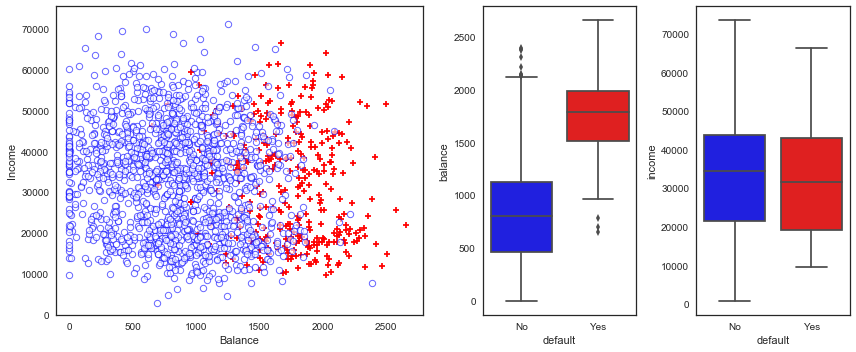

In [7]:
## building the canvas
fig=plt.figure(figsize=(12,5))
gs=mpl.gridspec.GridSpec(1,4)
ax1=plt.subplot(gs[0,:-2])
ax2=plt.subplot(gs[0,-2])
ax3=plt.subplot(gs[0,-1])

#Take a fraction of the sample where target value (default) is 'no'
df_no=df[df.default2 == 0].sample(frac=0.15)
#Take all samples where target value is 'yes'
df_yes=df[df.default2==1]
df_=df_no.append(df_yes)


#画第一幅图
ax1.scatter(df_[df.default == "Yes"].balance, df_[df.default =='Yes'].income, s=40, c='red', marker="+", linewidths=1)
ax1.scatter(df_[df.default == "No"].balance, df_[df.default=='No'].income, s=40, marker ="o", linewidths=1, 
            edgecolors='blue', facecolors='white', alpha=0.6)
ax1.set_ylim(ymin=0)
ax1.set_ylabel('Income')
ax1.set_xlabel('Balance')
ax1.set_xlim(xmin=-100)

#画第二 第三幅 箱图
c_palette={"No":"blue","Yes":"red"}
sns.boxplot('default','balance', data=df, orient='v', ax=ax2,palette=c_palette)
sns.boxplot('default','income', data=df, orient='v', ax=ax3,palette=c_palette)

gs.tight_layout(plt.gcf()) #automatically adjusts subplot params so that the subplot(s) fits in to the figure area
                            #(Get a reference to the current figure.)

## Logistic Regression

In [9]:
X_train=df.balance.values.reshape(-1,1)
y=df.default2

##Create array of test data. Calculate the classification probability
# and predicted classification
X_test=np.arange(df.balance.min(),df.balance.max()).reshape(-1,1) ##test data

clf=skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train,y)
prob=clf.predict_proba(X_test)

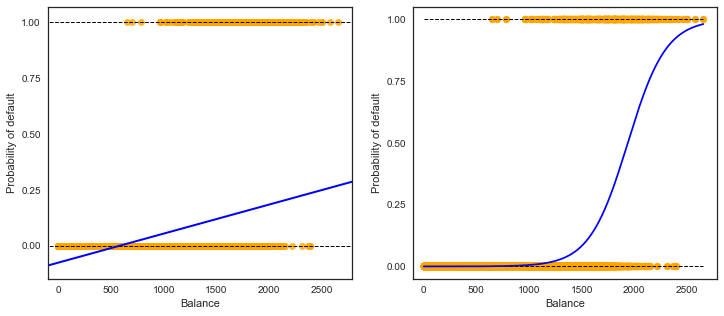

In [10]:
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(12,5))
#left plot
sns.regplot(df.balance,df.default2, order=1, ci=None,
           scatter_kws={'color':'orange'},
           line_kws={'color':'blue','lw':2}, ax=ax1)
#Rightplot ##
ax2.scatter(X_train, y, color='orange')
ax2.plot(X_test,prob[:,1], color='blue')

for ax in fig.axes:
    ax.hlines(1,xmin=ax.xaxis.get_data_interval()[0],
             xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed',lw=1)
    ax.hlines(0,xmin=ax.xaxis.get_data_interval()[0],
             xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed',lw=1)
    ax.set_ylabel("Probability of default")
    ax.set_xlabel("Balance")
    ax.set_yticks([0,0.25,0.5,0.75,1.])
    ax.set_xlim(xmin=-100)

In [11]:
y=df.default2

** scikit-learn **

In [12]:
clf=skl_lm.LogisticRegression(solver='newton-cg')
X_train=df.balance.values.reshape(-1,1)
clf.fit(X_train,y)

print(clf)
print('classes:',clf.classes_)
print('coefficients:',clf.coef_)
print('intercept:',clf.intercept_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)
classes: [0 1]
coefficients: [[ 0.00549891]]
intercept: [-10.65131923]


** statsmodels **

In [17]:
X_train=sm.add_constant(df.balance)
est=smf.Logit(y.ravel(), X_train).fit()
est.summary2().tables[1] ##summary vs summary2

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.651331,0.361169,-29.491287,3.723665e-191,-11.359208,-9.943453
balance,0.005499,0.000220,24.952404,2.010855e-137,0.005067,0.005931


In [23]:
X_train=sm.add_constant(df.student2); print(X_train)

      const  student2
0       1.0         0
1       1.0         1
2       1.0         0
3       1.0         0
4       1.0         0
5       1.0         1
6       1.0         0
7       1.0         1
8       1.0         0
9       1.0         0
10      1.0         1
11      1.0         1
12      1.0         0
13      1.0         0
14      1.0         0
15      1.0         0
16      1.0         0
17      1.0         1
18      1.0         0
19      1.0         0
20      1.0         0
21      1.0         0
22      1.0         0
23      1.0         0
24      1.0         0
25      1.0         0
26      1.0         0
27      1.0         0
28      1.0         0
29      1.0         1
...     ...       ...
9970    1.0         1
9971    1.0         1
9972    1.0         0
9973    1.0         0
9974    1.0         1
9975    1.0         0
9976    1.0         0
9977    1.0         1
9978    1.0         0
9979    1.0         0
9980    1.0         1
9981    1.0         0
9982    1.0         0
9983    1.

In [20]:
y=df.default2

In [22]:
est=smf.Logit(y,X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-3.504128,0.070713,-49.554094,0.000000,-3.642723,-3.365532
student2,0.404887,0.115019,3.520177,0.000431,0.179454,0.630320


## Multiple Logistic Regression

In [27]:
X_train=sm.add_constant(df[['balance','income','student2']]); print(X_train)

      const      balance        income  student2
0       1.0   729.526495  44361.625074         0
1       1.0   817.180407  12106.134700         1
2       1.0  1073.549164  31767.138947         0
3       1.0   529.250605  35704.493935         0
4       1.0   785.655883  38463.495879         0
5       1.0   919.588530   7491.558572         1
6       1.0   825.513331  24905.226578         0
7       1.0   808.667504  17600.451344         1
8       1.0  1161.057854  37468.529288         0
9       1.0     0.000000  29275.268293         0
10      1.0     0.000000  21871.073089         1
11      1.0  1220.583753  13268.562221         1
12      1.0   237.045114  28251.695345         0
13      1.0   606.742343  44994.555849         0
14      1.0  1112.968401  23810.174050         0
15      1.0   286.232560  45042.413036         0
16      1.0     0.000000  50265.312354         0
17      1.0   527.540184  17636.539617         1
18      1.0   485.936864  61566.106118         0
19      1.0  1095.07

In [28]:
est=smf.Logit(y, X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.869045,0.492273,-22.079320,4.995499e-108,-11.833882,-9.904209
balance,0.005737,0.000232,24.736506,4.331521e-135,0.005282,0.006191
income,0.000003,0.000008,0.369808,7.115254e-01,-0.000013,0.000019
student2,-0.646776,0.236257,-2.737595,6.189022e-03,-1.109831,-0.183721
